Dataset Link - https://www.kaggle.com/datasets/mubeenshehzadi/customer-purchase-behaviour

In [1]:
import pandas as pd

# Read the CSV file (adjust file path or delimiter as needed)
df = pd.read_csv('/content/shopping_behavior_updated.csv', sep=',')
print("\nShape of dataset:", df.shape)



Shape of dataset: (3900, 18)


In [2]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [4]:
duplicate_count = df.duplicated().sum()
print(f" Duplicate rows found: {duplicate_count}")

 Duplicate rows found: 0


In [5]:
print(" Descriptive Statistics (Numerical Columns):\n")
print(df.describe().T)

 Descriptive Statistics (Numerical Columns):

                        count         mean          std   min     25%     50%  \
Customer ID            3900.0  1950.500000  1125.977353   1.0  975.75  1950.5   
Age                    3900.0    44.068462    15.207589  18.0   31.00    44.0   
Purchase Amount (USD)  3900.0    59.764359    23.685392  20.0   39.00    60.0   
Review Rating          3900.0     3.749949     0.716223   2.5    3.10     3.7   
Previous Purchases     3900.0    25.351538    14.447125   1.0   13.00    25.0   

                           75%     max  
Customer ID            2925.25  3900.0  
Age                      57.00    70.0  
Purchase Amount (USD)    81.00   100.0  
Review Rating             4.40     5.0  
Previous Purchases       38.00    50.0  


In [6]:
print(" Data Cleaning & Summary Completed.")
print("Final Shape:", df.shape)

 Data Cleaning & Summary Completed.
Final Shape: (3900, 18)


In [12]:
# Clean column names: lowercase, replace spaces and parentheses with underscores
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_", regex=False)
              .str.replace("(", "", regex=False)
              .str.replace(")", "", regex=False)
)


print(df.columns.tolist())


['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount_usd', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'shipping_type', 'discount_applied', 'promo_code_used', 'previous_purchases', 'payment_method', 'frequency_of_purchases']


In [11]:
df.columns


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

#  Statistical plot - Heat Map

/tmp/ipython-input-3553652947.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_avg = df.groupby(['age_group', 'category'])['purchase_amount_usd'].mean().reset_index()


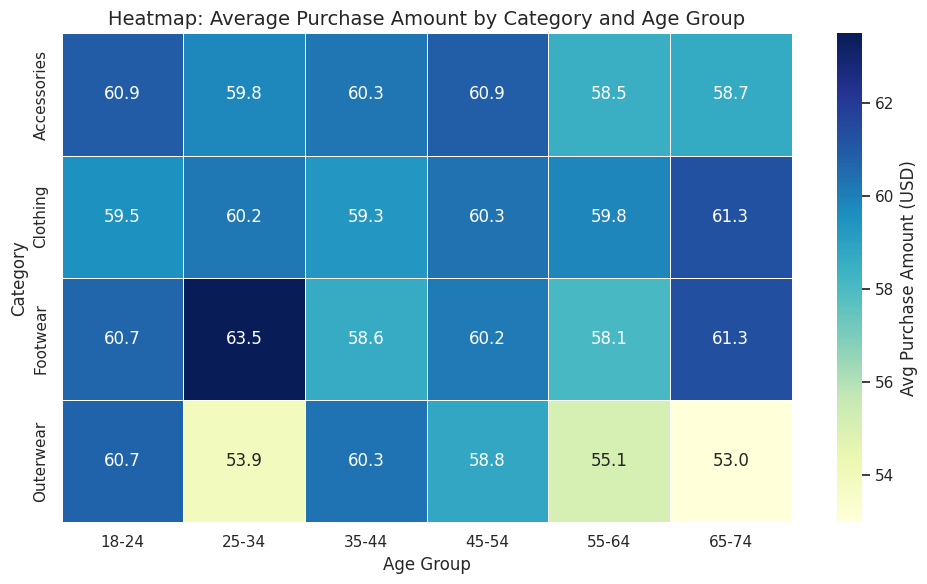

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Ensure age groups are defined
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Compute average purchase per age group & category
age_category_avg = df.groupby(['age_group', 'category'])['purchase_amount_usd'].mean().reset_index()

# Pivot table for heatmap
pivot_df = age_category_avg.pivot(index='category', columns='age_group', values='purchase_amount_usd')

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label':'Avg Purchase Amount (USD)'}
)
plt.title("Heatmap: Average Purchase Amount by Category and Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


# Categorical plot - Bar Plot

/tmp/ipython-input-3406058029.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


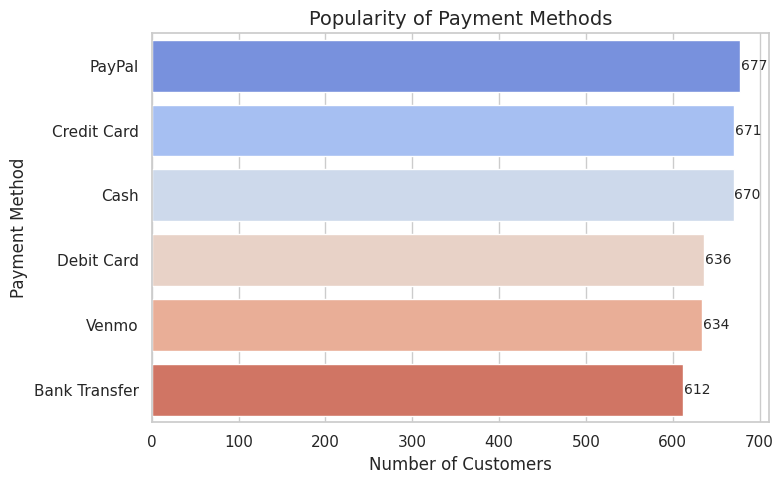

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many customers used each payment method
payment_counts = df['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'count']

# Plot horizontal bar
plt.figure(figsize=(8,5))
sns.barplot(
    data=payment_counts,
    y='payment_method',
    x='count',
    palette='coolwarm'
)

# Annotate bars with counts
for i, row in payment_counts.iterrows():
    plt.text(row['count'] + 1, i, str(row['count']), va='center', fontsize=10)

plt.title("Popularity of Payment Methods", fontsize=14)
plt.xlabel("Number of Customers")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()


# Relational plot - Line plot

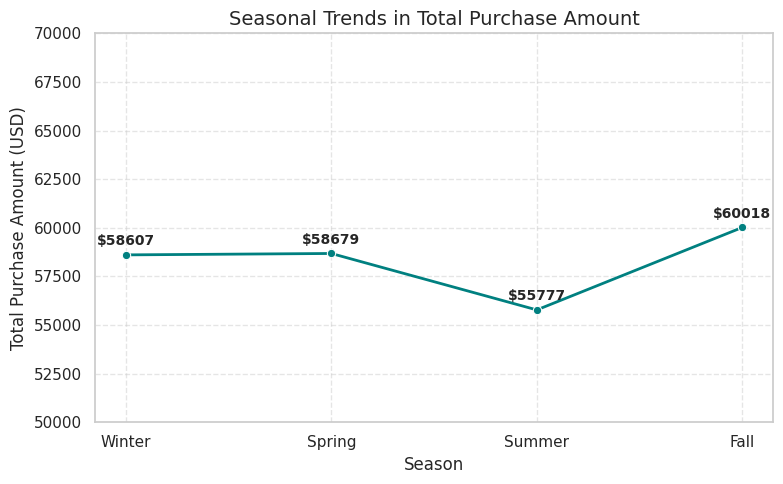

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


season_purchase = df.groupby('season')['purchase_amount_usd'].sum().reset_index()


season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_purchase['season'] = pd.Categorical(season_purchase['season'], categories=season_order, ordered=True)
season_purchase = season_purchase.sort_values('season')


plt.figure(figsize=(8,5))
sns.lineplot(
    data=season_purchase,
    x='season',
    y='purchase_amount_usd',
    marker='o',
    linewidth=2,
    color='teal'
)


for i, row in season_purchase.iterrows():
    plt.text(row['season'], row['purchase_amount_usd'] + 500, f"${row['purchase_amount_usd']:.0f}",
             ha='center', fontsize=10, fontweight='bold')

plt.title("Seasonal Trends in Total Purchase Amount", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Total Purchase Amount (USD)")
plt.ylim(50000, 70000)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2696224127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items, y='item', x='count', palette='magma')


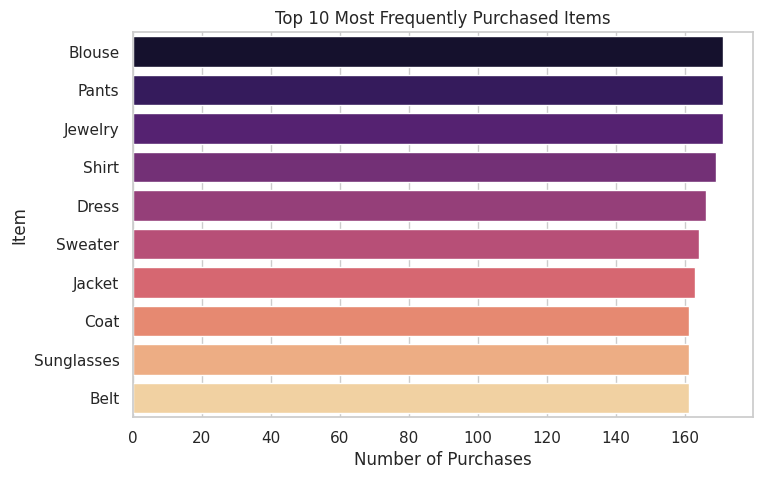

In [36]:
top_items = df['item_purchased'].value_counts().head(10).reset_index()
top_items.columns = ['item', 'count']

plt.figure(figsize=(8,5))
sns.barplot(data=top_items, y='item', x='count', palette='magma')
plt.title("Top 10 Most Frequently Purchased Items")
plt.xlabel("Number of Purchases")
plt.ylabel("Item")
plt.show()


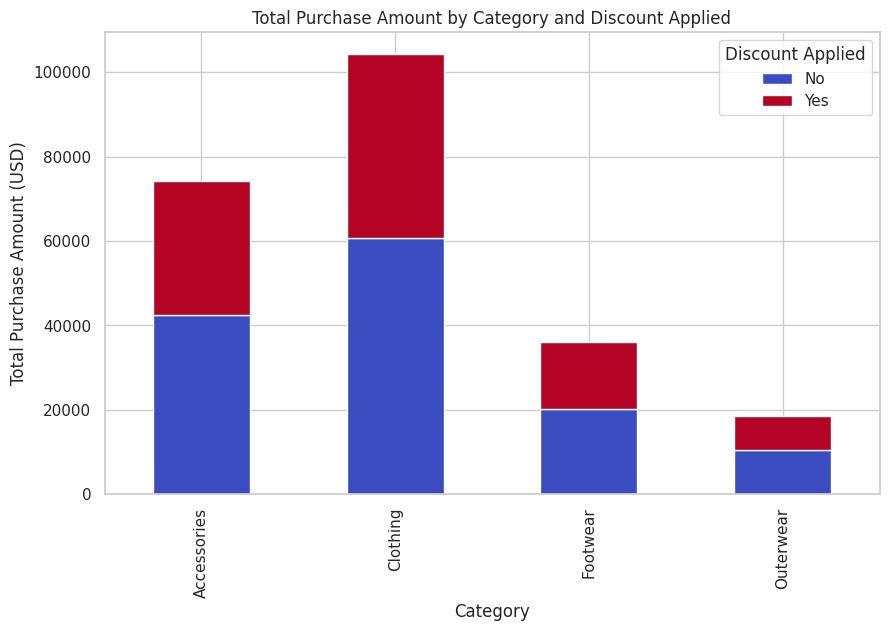

In [37]:
discount_category = df.groupby(['category','discount_applied'])['purchase_amount_usd'].sum().unstack().fillna(0)

discount_category.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Total Purchase Amount by Category and Discount Applied")
plt.ylabel("Total Purchase Amount (USD)")
plt.xlabel("Category")
plt.legend(title="Discount Applied")
plt.show()


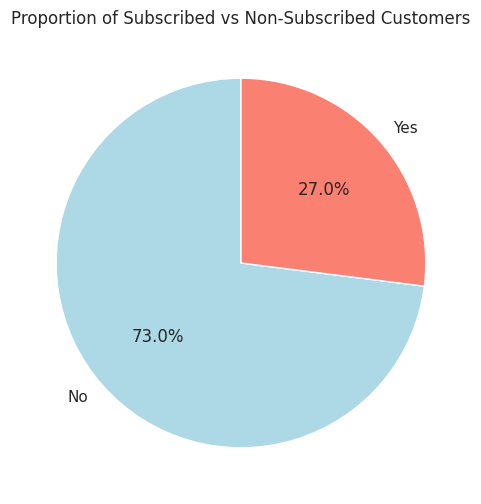

In [38]:
subscription_counts = df['subscription_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['lightblue','salmon'], startangle=90)
plt.title("Proportion of Subscribed vs Non-Subscribed Customers")
plt.show()


/tmp/ipython-input-1679921108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='shipping_type', y='purchase_amount_usd', palette='Set2')


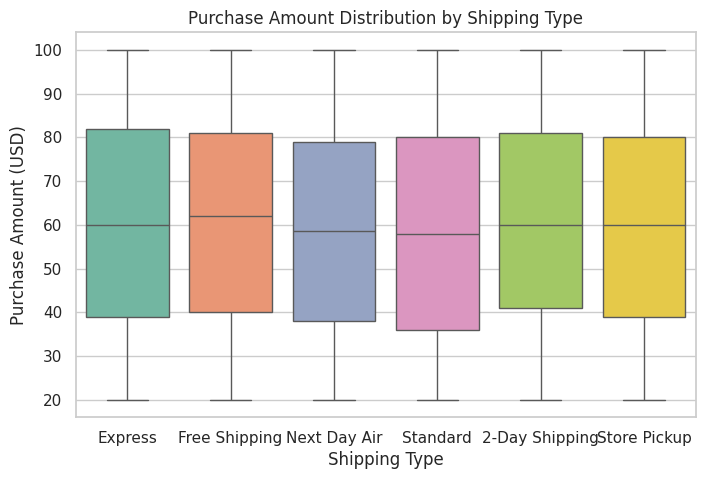

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='shipping_type', y='purchase_amount_usd', palette='Set2')
plt.title("Purchase Amount Distribution by Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Purchase Amount (USD)")
plt.show()


/tmp/ipython-input-4022756691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loc_total, y='location', x='purchase_amount_usd', palette='plasma')


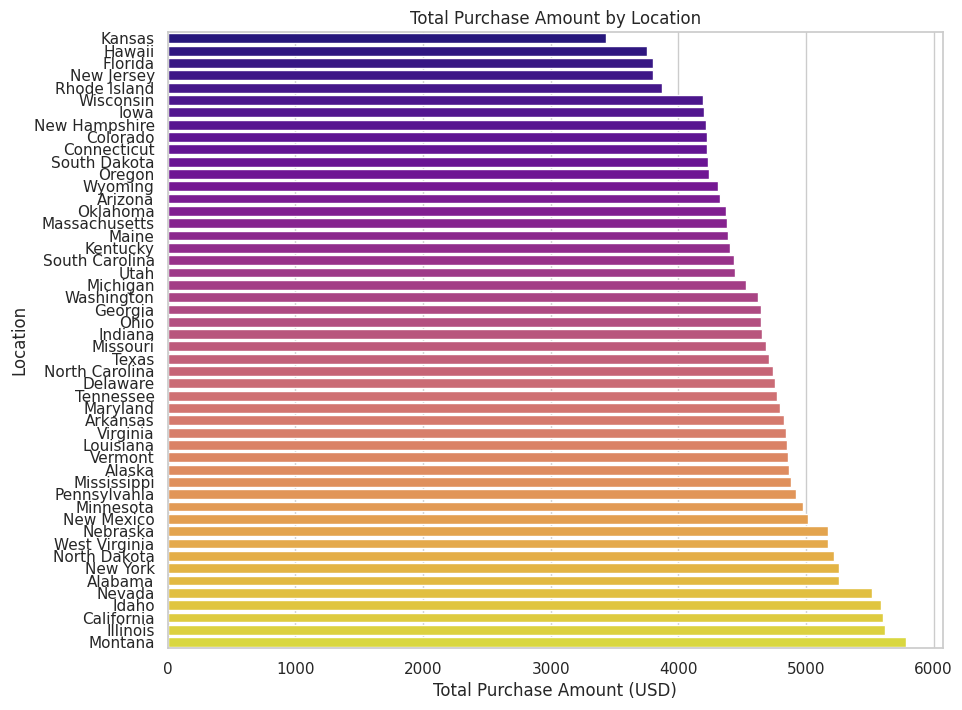

In [40]:
loc_total = df.groupby('location')['purchase_amount_usd'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=loc_total, y='location', x='purchase_amount_usd', palette='plasma')
plt.title("Total Purchase Amount by Location")
plt.xlabel("Total Purchase Amount (USD)")
plt.ylabel("Location")
plt.show()
